In [1]:
from IPython.display import HTML

<div class="alert alert-success" role="alert">
  <h2 class="alert-heading">Introducción a la Química Cuántica: Taller 3: Átomos Hidrogenoides</h2>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h3 class="alert-heading">Escuela de Química</h3>
  <h3 class="alert-heading">Universidad Industrial de Santander</h3>
  <p>
  </div>

### <div class="alert alert-info"><font color='blue'> <h2 class="alert-heading">Preguntas</h2>

**<div class="alert alert-warning">1. Para el estado fundamental del hidrógeno. a) Calcular la probabilidad de encontrar el electrón a una distancia del núcleo superior a 2 veces el radio de Bohr. b) Calcular el radio de la esfera dentro de la cual la probabilidad de encontrar el electrón es del 90%.**

**<div class="alert alert-info">2. Para el orbital 2s del hidrógeno, calcular la distancia más probable del electrón al núcleo.**

**<div class="alert alert-warning">3. Localice los nodos radiales en el orbital 3s del átomo de hidrógeno.**

**<div class="alert alert-warning">4.  Para el electrón en el orbital 1s del átomo de hidrógeno calcular $<r>$ y $<r^2>$. Calcular la incertidumbre en la distancia al núcleo.**
    
**<div class="alert alert-success">5.  El operador para la energía potencial de un electrón en el átomo de hidrógeno o un ion hidrogenoide es $V(r) = \frac{-Ze^2}{4πε_0r}$. Calcule el valor <V> para un electrón en el nivel fundamental. B) ¿Cuál es el valor de $<E_c>$ ?.** 
    
**<div class="alert alert-success">6.  La serie de Humphreys del espectro del átomo de hidrógeno empieza a 12368 nm y se ha seguido hasta 3281.4 nm. ¿Qué tipo de transiciones están implicadas y cuáles son los valores de longitud de onda de las transiciones intermedias?**
    
**<div class="alert alert-danger">7.  Calcule los ángulos que los vectores momento angular forman con el eje $z$ para los orbitales $2p_{+1}$, $2p_0$ y $2p_{-1}$**

**<div class="alert alert-danger">8.  ¿Cuáles son los puntos de máxima probabilidad de encontrar al electrón para un átomo hidrogenoide en el orbital $2p_z$?**
$$\Psi_{2p_z}=\frac{1}{\sqrt{32\pi}}\left(\frac{Z}{a_0}\right)^{\frac{3}{2}} \frac{Zr}{a_0}e^{-\frac{Zr}{2a_0}}cos \theta$$
    
**<div class="alert alert-danger">9 Para el átomo de hidrógeno en el orbital $2p_z$ la probabilidad de encontrar al electrón en el cuadrante comprendido entre las partes positivas de los ejes $(+x, +y, +z)$, es 0.125. Demuéstrelo.**

**<div class="alert alert-danger">10.  Las orientaciones de máxima densidad de probabilidad del orbital $3d_{x^2 - y^2}$ − coinciden con las direcciones de los ejes $X$ e $Y$. Demuéstrelo.
$ψ(3d_{x^2 - y^2})=NR(r)sen^2θ·cos2φ$**

**<div class="alert alert-danger">11. El estado del átomo de hidrógeno descrito por el orbital 2px viene dado por la siguiente combinación lineal:**

$$2p_x=\frac{1}{\sqrt{2}}(\Psi_{211} + \Psi_{21-1})=\frac{1}{\sqrt{32\pi}}\left(\frac{Z}{a_0}\right)^{\frac{3}{2}} \frac{Zr}{a_0}e^{-\frac{Zr}{2a_0}}sen \theta cos \phi$$
    
**<div class="alert alert-danger"> a) Determine los valores medios del módulo y de la componente $z$ del momento angular orbital para el hidrógeno en ese estado. b) ¿Es autofunción de los operadores $\hat{L}^2$ y $\hat{L}_z$?**

In [2]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
from sympy import *
from sympy.physics.hydrogen import Psi_nlm, R_nl
init_printing(use_unicode=True)

**<div class="alert alert-warning">1. Para el estado fundamental del hidrógeno. a) Calcular la probabilidad de encontrar el electrón a una distancia del núcleo superior a 2 veces el radio de Bohr. b) Calcular el radio de la esfera dentro de la cual la probabilidad de encontrar el electrón es del 90%.**
$$P_r(r_1 \leq r \leq r_2)=\int_{r_1}^{r_2} |R_{1s}|^2 r^2 dr$$

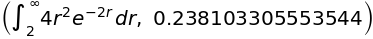

In [3]:
a, n=symbols('a n')
var("r Z")
(r, Z)
#R_nl(n, l, r, Z)
Pr=Integral(R_nl(1, 0, r, 1)**2 * r**2, (r, 2, oo))
Pr, Pr.evalf()

In [4]:
Pr.evalf()

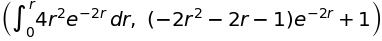

In [5]:
a, n, r=symbols('a n r')
var("r Z phi theta")
(r, Z)
#R_nl(n, l, r, Z)
Pr1=Integral(R_nl(1, 0, r, 1)**2 * r**2, (r, 0, r))
Pr1, Pr1.doit()

In [6]:
from scipy import optimize
def f(x):
    return (-2*x**2 - 2*x - 1)*np.e**(-2*x) + 0.1  # only one real root at x =1
def fprime(x):
    return (4*x**2)*np.e**(-2*x) #Derivada de la función
sol = optimize.root_scalar(f, x0=1, fprime=fprime, method='newton')
sol.root, sol.iterations

**<div class="alert alert-info">2. Para el orbital 2s del hidrógeno, calcular la distancia más probable del electrón al núcleo.**

In [7]:
# calculamos la primera y segunda derivada de  f(x)  mediante la función diff:
f1=R_nl(2, 0, r, 1)**2 * r**2
df1 = diff(f1, r) # 1era. derivada
d2f1 = diff(f1,r,2) # Segunda derivada
f1, df1.simplify(), d2f1.simplify()

In [8]:
#Los puntos críticos los calculamos resolviendo la ecuación  f′(x)=0
pc1 = solve(Eq(df1, 0))
pc1

In [9]:
pc1[2].evalf(), pc1[3].evalf()

In [10]:
p1=d2f1.subs(r,pc1[0]) # Primer punto crítico
p2=d2f1.subs(r,pc1[1]) # Segundo punto crítico
p3=d2f1.subs(r,pc1[2]) # Tercer punto crítico
p4=d2f1.subs(r,pc1[3]) # Cuarto punto crítico
p1.evalf(),p2.evalf(),p3.evalf(),p4.evalf()

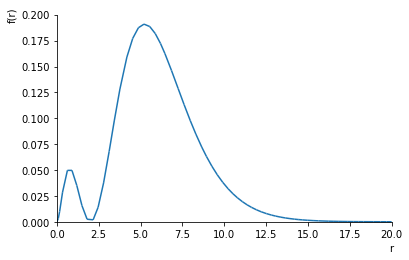

In [11]:
plot(f1, (r, 0, 20))

In [12]:
#Podemos automatizar este proceso definiendo una función que realice el procedimiento descrito.
def maxminf(f):
    """ Calcula los máximos y mínimos de una función f(r) """
    df = diff(f, r) # 1era. derivada
    d2f = diff(f, r, 2) # 2da. derivada
    pcs = solve(Eq(df,0)) # puntos críticos
    for p in pcs:
        if d2f.subs(r,p)>0: 
            tipo="Min"
        elif d2f.subs(r,p)<0: 
            tipo="Max"
        else: 
            tipo="Indefinido"
        print("x = %f (%s)"%(p,tipo))

In [13]:
maxminf(R_nl(2, 0, r, 1)**2 * r**2)

x = 0.000000 (Min)
x = 2.000000 (Min)
x = 0.763932 (Max)
x = 5.236068 (Max)


**<div class="alert alert-warning">3. Localice los nodos radiales en el orbital 3s del átomo de hidrógeno.**

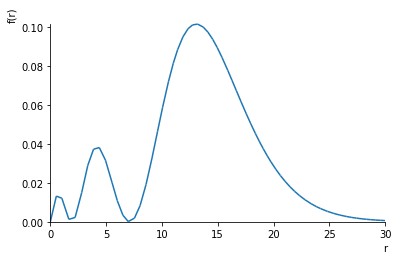

In [14]:
plot(R_nl(3, 0, r, 1)**2*r**2, (r, 0, 30.0))

In [15]:
maxminf((R_nl(3, 0, r, 1)**2))

x = 1.901924 (Min)
x = 3.531373 (Max)
x = 7.098076 (Min)
x = 11.468627 (Max)


**<div class="alert alert-warning">4.  Para el electrón en el orbital 1s del átomo de hidrógeno calcular $<r>$ y $<r^2>$. Calcular la incertidumbre en la distancia al núcleo.**

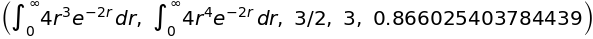

In [16]:
a, n, r=symbols('a n r')
var("r Z")
(r, Z)
#R_nl(n, l, r, Z)
Prr=Integral(R_nl(1, 0, r, 1)**2 * r**3, (r, 0, oo))
Prr2=Integral(R_nl(1, 0, r, 1)**2 * r**4, (r, 0, oo))
Prr, Prr2, Prr.doit(), Prr2.doit(), sqrt(Prr2.doit() - (Prr.doit())**2).evalf()

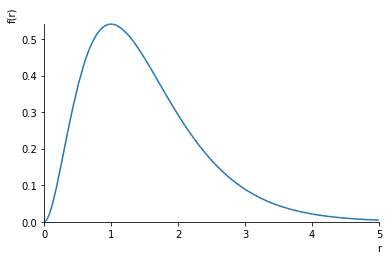

In [17]:
plot(R_nl(1, 0, r, 1)**2*r**2, (r, 0, 5.0))

**<div class="alert alert-success">5.  El operador para la energía potencial de un electrón en el átomo de hidrógeno o un ion hidrogenoide es $V(r) = \frac{-Ze^2}{4πε_0r}$. Calcule el valor <V> para un electrón en el nivel fundamental. B) ¿Cuál es el valor de $<E_c>$ ?.**

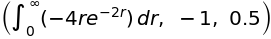

In [18]:
a, n, r=symbols('a n r')
var("r Z")
(r, Z)
#R_nl(n, l, r, Z)
Vr=Integral(R_nl(1, 0, r, 1)**2 * (-r), (r, 0, oo))

Vr, Vr.doit(), -0.5-Vr.doit()

**<div class="alert alert-success">6.  La serie de Humphreys del espectro del átomo de hidrógeno empieza a 12368 nm y se ha seguido hasta 3281.4 nm. ¿Qué tipo de transiciones están implicadas y cuáles son los valores de longitud de onda de las transiciones intermedias?**
$$\large \Delta E = E_{n_f} - E_{n_i}= -0.5 \left (\frac{1}{n_f^2} - \frac{1}{n_i^2} \right ) = h\nu = \frac{hc}{\lambda} \Longrightarrow$$
$$\large \frac{1}{\lambda}= \frac{-0.5}{hc} \left (\frac{1}{n_f^2} - \frac{1}{n_i^2} \right )=R \left (\frac{1}{n_f^2} - \frac{1}{n_i^2} \right )$$

In [19]:
R=1.097*10**7
lamb=3281.2*10**(-9)
nf=sqrt(R*lamb)
DE1=1/(R*(1/(6**2)-1/(8**2)))
DE2=1/(R*(1/(6**2)-1/(9**2)))
DE3=1/(R*(1/(6**2)-1/(10**2)))
DE4=1/(R*(1/(6**2)-1/(11**2)))
round(nf), round(DE1*10**9), round(DE2*10**9), round(DE3*10**9), round(DE4*10**9) # En nanometros